# Music Playlists

The goal of this notebook is to conduct some quick, exploratory data analysis for an initial presentation about what could comprise a successful music playlist.

The approach taken is to investigate playlist characteristics that would make a playlist successful for everyone regardless if the playlist creator was a celebrity or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### Data Cleaning and Processing

In [2]:
data = pd.read_csv('playlist_summary_external.txt', sep='\t')
# Initial Size is 403,366 rows
data.drop_duplicates(subset = ["playlist_uri"], inplace=True)
data.drop(['skippers','n_local_tracks','monthly_stream30s','monthly_owner_stream30s','mau_both_months','owner_country','playlist_uri','owner','mood_3','mood_2','genre_3','genre_2','tokens'], axis=1, inplace=True)
# Owner Country removed because only 1 unique value
# Insights only applicable to US
data[['mau']] = data[['mau']].mask(data[data['mau'] > 35].isna(),np.nan)
data[['users']] = data[['users']].mask(data[data['users'] > 35].isna(),np.nan)
data.dropna(axis=0, how='any',inplace=True)
data[['n_tracks']] = data[['n_tracks']].mask(data[data['n_tracks'] > 1].isna(),np.nan)
data[['n_artists']] = data[['n_artists']].mask(data[data['n_artists'] > 1].isna(),np.nan)
data[['n_albums']] = data[['n_albums']].mask(data[data['n_albums'] > 1].isna(),np.nan)
data[['streams']] = data[['streams']].mask(data[data['streams'] > 1].isna(),np.nan)
data[['stream30s']] = data[['stream30s']].mask(data[data['stream30s'] > 1].isna(),np.nan)
data[['dau']] = data[['dau']].mask(data[data['dau'] > 1].isna(),np.nan)
data[['wau']] = data[['wau']].mask(data[data['wau'] > 1].isna(),np.nan)
data[['mau_previous_month']] = data[['mau_previous_month']].mask(data[data['mau_previous_month'] > 1].isna(),np.nan)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data[['streams','stream30s','dau','wau','mau_previous_month','n_albums','n_artists','n_tracks']] = data[['streams','stream30s','dau','wau','mau_previous_month','n_albums','n_artists','n_tracks']].mask(data[((data > (Q1 - 1.5 * IQR)) & (data < (Q3 + 1.5 * IQR)))].isna(),np.nan)
data['percent_success'] = data['mau']/data['users']
data['successful'] = np.where(data['percent_success']>0.5, 1, 0)
data.replace(to_replace =["Other", "-"],value=np.nan,inplace=True)
data.drop(['users','mau'], axis=1, inplace=True)
#Q1 = data.quantile(0.25)
#Q3 = data.quantile(0.75)
#IQR = Q3 - Q1
#data[['percent_success']] = data[['percent_success']].mask(data[((data > (Q1 - 1.5 * IQR)) & (data < (Q3 + 1.5 * IQR)))].isna(),np.nan)
data.dropna(axis=0, how='all',inplace=True)


### Initial Data Summarization and Graphing

In [3]:
data.describe()

,streams,stream30s,dau,wau,mau_previous_month,n_tracks,n_artists,n_albums,percent_success,successful
count,11368.000000,11261.000000,10704.000000,11372.000000,11115.000000,11715.000000,10927.000000,10958.000000,13108.000000,13108.000000
mean,92.660802,56.631294,6.511865,30.220893,92.243365,106.860094,56.732589,56.258350,0.452465,0.240769
std,90.295992,56.567631,4.999042,23.054605,71.660442,100.571745,53.340369,54.194207,0.103113,0.427567
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020348,0.000000
25%,28.000000,16.000000,3.000000,14.000000,43.000000,33.000000,15.000000,14.000000,0.395854,0.000000
50%,60.000000,36.000000,5.000000,21.000000,65.000000,71.000000,39.000000,38.000000,0.449123,0.000000
75%,127.000000,78.000000,8.000000,38.000000,114.000000,146.000000,83.000000,84.000000,0.500000,0.000000
max,425.000000,260.000000,25.000000,117.000000,358.000000,453.000000,229.000000,233.000000,0.979167,1.000000


Text(0.5, 0, 'Daily Streams')

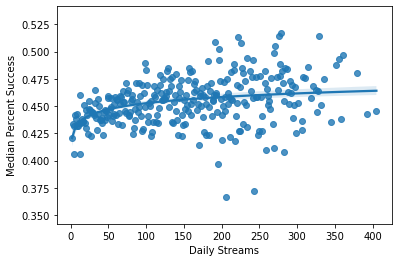

In [4]:
post = data.copy()
median = post.groupby('streams').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('streams').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='streams')
post = post[post['count']>6]
sns.regplot(x="streams", y='percent_success', data=post, fit_reg=True, scatter = True,logx=True)

plt.ylabel('Median Percent Success')
plt.xlabel('Daily Streams')

Text(0.5, 0, 'Daily Streams [>30 Seconds]')

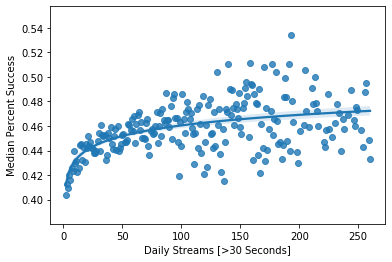

In [5]:
post = data.copy()
median = post.groupby('stream30s').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('stream30s').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='stream30s')
post = post[post['count']>6]
sns.regplot(x="stream30s", y='percent_success', data=post, fit_reg=True, scatter = True,logx=True)

plt.ylabel('Median Percent Success')
plt.xlabel('Daily Streams [>30 Seconds]')

Text(0.5, 0, 'DAU')

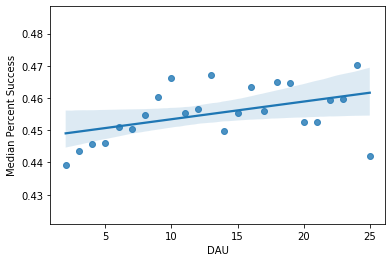

In [6]:
post = data.copy()
median = post.groupby('dau').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('dau').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='dau')
post = post[post['count']>6]
sns.regplot(x="dau", y='percent_success', data=post, fit_reg=True, scatter = True)

plt.ylabel('Median Percent Success')
plt.xlabel('DAU')

Text(0.5, 0, 'WAU')

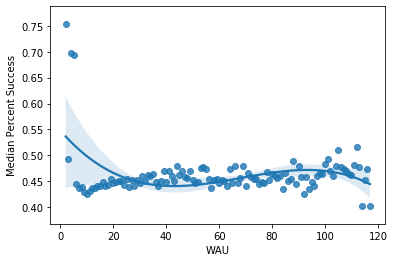

In [7]:
post = data.copy()
median = post.groupby('wau').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('wau').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='wau')
post = post[post['count']>6]
sns.regplot(x="wau", y='percent_success', data=post, fit_reg=True, scatter = True, order=3)
plt.ylabel('Median Percent Success')
plt.xlabel('WAU')

Text(0.5, 0, 'MAU Previous Month')

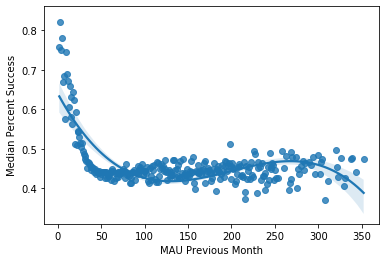

In [8]:
post = data.copy()
median = post.groupby('mau_previous_month').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('mau_previous_month').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='mau_previous_month')
post = post[post['count']>6]
sns.regplot(x="mau_previous_month", y='percent_success', data=post, fit_reg=True, scatter = True, order=3)
plt.ylabel('Median Percent Success')
plt.xlabel('MAU Previous Month')

Text(0.5, 0, 'Tracks [#]')

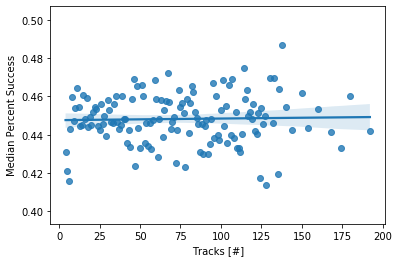

In [9]:
post = data.copy()
median = post.groupby('n_tracks').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('n_tracks').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='n_tracks')
post = post[post['count']>25]
sns.regplot(x="n_tracks", y='percent_success', data=post,
            fit_reg=True, scatter = True)
plt.ylabel('Median Percent Success')
plt.xlabel('Tracks [#]')

Text(0.5, 0, 'Artists [#]')

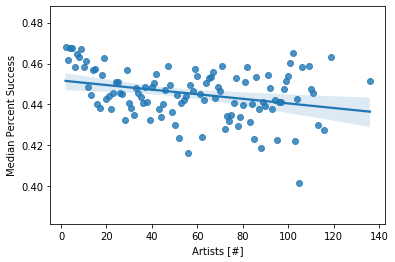

In [10]:
post = data.copy()
median = post.groupby('n_artists').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('n_artists').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='n_artists')
post = post[post['count']>25]
p= sns.regplot(x="n_artists", y='percent_success', data=post,
            fit_reg=True, scatter = True)
plt.ylabel('Median Percent Success')
plt.xlabel('Artists [#]')

Text(0.5, 0, 'Albums [#]')

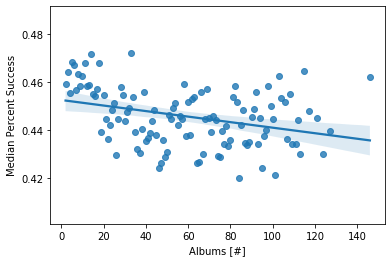

In [11]:
post = data.copy()
median = post.groupby('n_albums').agg({'percent_success':'median'}).reset_index(drop=False)
count = post.groupby('n_albums').agg({'percent_success':'count'}).reset_index(drop=False)
count.rename(columns={'percent_success':'count'}, inplace=True)
post = pd.merge(median,count,on='n_albums')
post = post[post['count']>25]
p = sns.regplot(x="n_albums", y='percent_success', data=post,
            fit_reg=True, scatter = True)
plt.ylabel('Median Percent Success')
plt.xlabel('Albums [#]')

Text(0, 0.5, 'Tracks [#]')

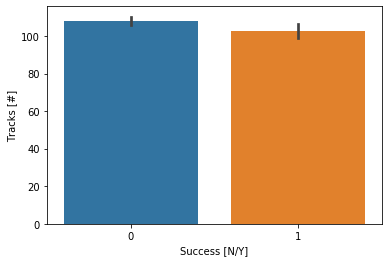

In [24]:
sns.barplot(data = data, x = 'successful', y = 'n_tracks')
plt.xlabel('Success [N/Y]')
plt.ylabel('Tracks [#]')

Text(0, 0.5, 'Albums [#]')

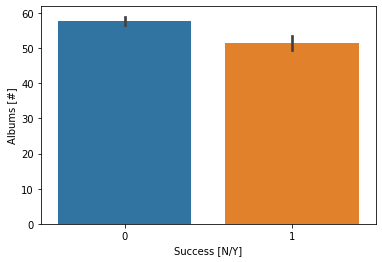

In [12]:
sns.barplot(data = data, x = 'successful', y = 'n_albums')
plt.xlabel('Success [N/Y]')
plt.ylabel('Albums [#]')

Text(0, 0.5, 'Artists [#]')

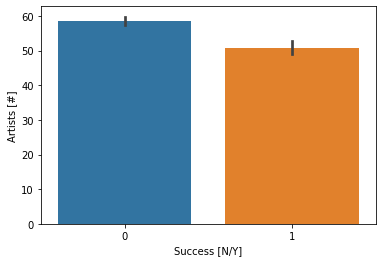

In [13]:
sns.barplot(data = data, x = 'successful', y = 'n_artists')
plt.xlabel('Success [N/Y]')
plt.ylabel('Artists [#]')

Text(0, 0.5, 'Tracks [#]')

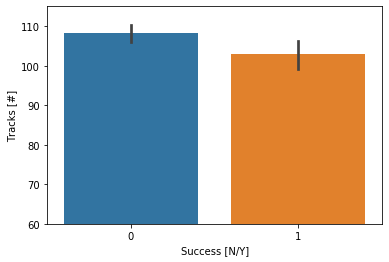

In [14]:
p=sns.barplot(data = data, x = 'successful', y = 'n_tracks')
p.set(ylim=(60,115))
plt.xlabel('Success [N/Y]')
plt.ylabel('Tracks [#]')

Text(0, 0.5, 'Genre')

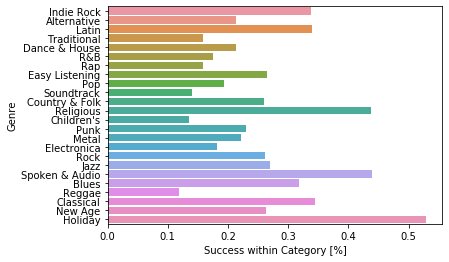

In [15]:
sns.barplot(data = data, x = 'successful', y = 'genre_1',ci=None)
plt.xlabel('Success within Category [%]')
plt.ylabel('Genre')

Text(0, 0.5, 'Mood')

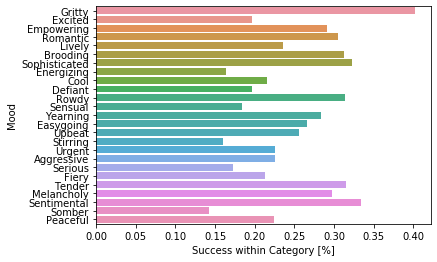

In [16]:
sns.barplot(data = data, x = 'successful', y = 'mood_1',ci=None)
plt.xlabel('Success within Category [%]')
plt.ylabel('Mood')

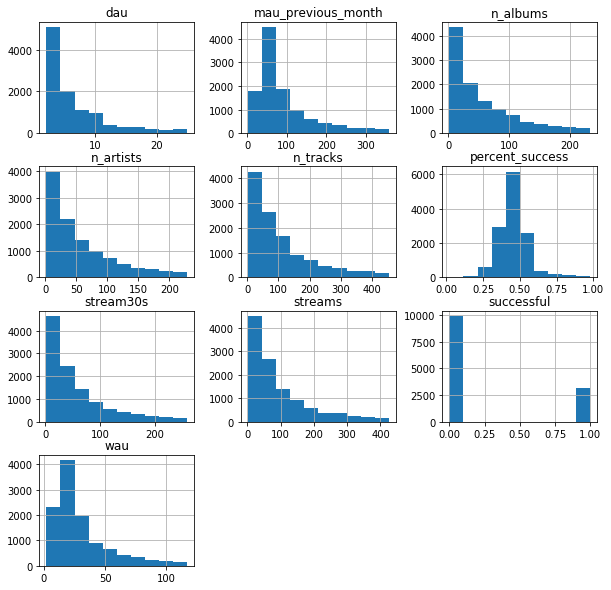

In [18]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

### Correlation Analysis

In [17]:
# One Hot Encoding to Convert Categorical to Numerical Indicator Variables
correl = data
genre_1 = pd.get_dummies(correl['genre_1'])
mood_1 = pd.get_dummies(correl['mood_1'])
correl = correl.drop('genre_1',axis = 1)
correl = correl.drop('mood_1',axis = 1)
correl = correl.join(genre_1)
correl = correl.join(mood_1)     
           

In [19]:
rho, pval = stats.spearmanr(correl, nan_policy='omit')

pvals = pd.DataFrame(pval, columns=correl.columns.values)
rows = {}
for i in range(len(correl.columns.values)):
    rows[i] = correl.columns[i]
pvals = pvals.rename(index=rows)
round(pvals, 2)


,streams,stream30s,dau,wau,mau_previous_month,n_tracks,n_artists,n_albums,percent_success,successful,...,Sensual,Sentimental,Serious,Somber,Sophisticated,Stirring,Tender,Upbeat,Urgent,Yearning
streams,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.90,0.02,0.04,0.14,0.01,0.08,0.80,0.61,0.28,0.16
stream30s,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.41,0.35,0.02,0.61,0.56,0.10,0.10,0.16,0.16,0.92
dau,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.57,0.10,0.03,0.99,0.92,0.04,0.12,0.53,0.81,0.72
wau,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.73,0.32,0.63,0.74,0.97,0.12,0.51,0.42,0.53,0.43
mau_previous_month,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.91,0.10,0.02,0.50,0.86,0.26,0.02,0.03,0.39,0.63
n_tracks,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,...,0.23,0.04,0.99,0.00,0.00,0.74,0.47,0.38,0.04,0.79
n_artists,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.98,0.00,0.01,0.09,0.20
n_albums,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.92,0.00,0.00,0.09,0.24
percent_success,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.00,...,0.00,0.15,0.06,0.15,0.00,0.52,0.01,0.15,0.33,0.01
successful,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.08,0.14,0.00,0.09,0.01,0.46,0.45,0.00


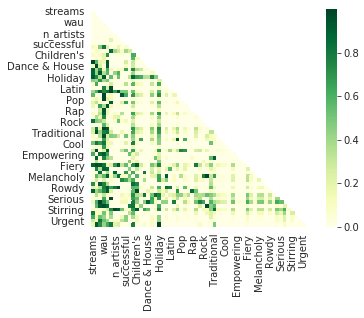

In [20]:
# Graphing P-Values
mask = np.zeros_like(pvals)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    p2 = sns.heatmap(pvals, mask=mask, square=True, cmap = "YlGn")
    

In [21]:
# R Table
rhos = pd.DataFrame(rho, columns=correl.columns.values)
rhos = rhos.rename(index=rows)
round(rhos, 3)


,streams,stream30s,dau,wau,mau_previous_month,n_tracks,n_artists,n_albums,percent_success,successful,...,Sensual,Sentimental,Serious,Somber,Sophisticated,Stirring,Tender,Upbeat,Urgent,Yearning
streams,1.000,0.915,0.748,0.654,0.529,0.286,0.251,0.246,0.097,0.040,...,0.001,-0.022,-0.019,-0.014,-0.024,-0.017,-0.002,0.005,-0.010,-0.013
stream30s,0.915,1.000,0.716,0.611,0.492,0.224,0.166,0.163,0.173,0.090,...,-0.008,-0.009,-0.022,-0.005,-0.005,-0.016,0.016,0.013,-0.013,-0.001
dau,0.748,0.716,1.000,0.844,0.720,0.073,0.066,0.065,0.083,0.039,...,0.006,-0.016,-0.021,0.000,0.001,-0.020,-0.015,0.006,-0.002,-0.003
wau,0.654,0.611,0.844,1.000,0.820,0.080,0.069,0.073,0.096,0.042,...,0.003,-0.009,-0.005,0.003,-0.000,-0.015,0.006,0.008,-0.006,0.007
mau_previous_month,0.529,0.492,0.720,0.820,1.000,0.041,0.039,0.038,-0.169,-0.170,...,0.001,-0.016,-0.022,-0.006,-0.002,-0.011,-0.022,0.020,-0.008,0.005
n_tracks,0.286,0.224,0.073,0.080,0.041,1.000,0.728,0.704,0.012,-0.027,...,0.011,-0.019,0.000,-0.027,-0.035,0.003,-0.007,-0.008,-0.019,-0.002
n_artists,0.251,0.166,0.066,0.069,0.039,0.728,1.000,0.899,-0.069,-0.078,...,0.029,-0.028,-0.059,-0.041,-0.061,0.000,-0.072,0.025,-0.016,0.012
n_albums,0.246,0.163,0.065,0.073,0.038,0.704,0.899,1.000,-0.071,-0.064,...,0.028,-0.030,-0.060,-0.036,-0.061,-0.001,-0.058,0.035,-0.016,0.011
percent_success,0.097,0.173,0.083,0.096,-0.169,0.012,-0.069,-0.071,1.000,0.741,...,-0.032,0.013,-0.016,-0.013,0.053,0.006,0.024,0.013,-0.008,0.021
successful,0.040,0.090,0.039,0.042,-0.170,-0.027,-0.078,-0.064,0.741,1.000,...,-0.034,0.016,-0.015,-0.013,0.037,-0.015,0.022,0.007,-0.007,0.025


(array([ 0.5,  3.5,  6.5,  9.5, 12.5, 15.5, 18.5, 21.5, 24.5, 27.5, 30.5,
        33.5, 36.5, 39.5, 42.5, 45.5, 48.5, 51.5, 54.5, 57.5]),
 <a list of 20 Text xticklabel objects>)

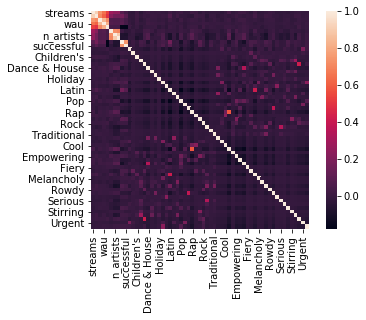

In [22]:
# R Plot
sns.heatmap(rhos, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)


In [23]:
# Finds Statistically Significant and Strong Correlations
arr = []

for i in correl.columns.values:
    for j in correl.columns.values:
        if pvals.loc[i,j] <= 0.05 and (rhos.loc[i,j] > 0.5 or rhos.loc[i,j] < -0.5) and i != j and [j,i, pvals.loc[j,i], rhos.loc[j,i]] not in arr:
            #if i == 'percent_success' or j == 'percent_success':
            arr.append([i,j, pvals.loc[i,j], rhos.loc[i,j]])

arr = pd.DataFrame(arr,columns=['1','2','P-Value','R'])
arr.sort_values('R', ascending = True)

,1,2,P-Value,R
3,streams,mau_previous_month,0.0,0.528764
13,Rap,Defiant,0.0,0.585077
5,stream30s,wau,0.0,0.611380
2,streams,wau,0.0,0.653736
10,n_tracks,n_albums,0.0,0.703721
4,stream30s,dau,0.0,0.715655
7,dau,mau_previous_month,0.0,0.719905
9,n_tracks,n_artists,0.0,0.727843
12,percent_success,successful,0.0,0.740540
1,streams,dau,0.0,0.747968


### Summary
    The results show that it is fruitful to investigate defining a successful playlist within a specific genre as playlists can vary greatly and a successful holiday playlist has very different characteristics from a successful playlist targeted for gym workouts.